# Build Simple workflow using LangGraph

# State

In [1]:
### The below class will create the Sate Schema 
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info : str

# Node

In [2]:
def start_play(state : State):
    print('Start Play node has been called')
    return {"graph_info" : state['graph_info'] + " I am planning to play"}

def cricket(state : State):
    print('My cricket node is called')
    return {"graph_info" : state['graph_info'] + " Cricket"}

def soccer(state : State):
    print('My soccer node is called')
    return {"graph_info" : state['graph_info'] + " Soccer"}


In [3]:
import random
from typing import Literal

def random_play(state : State)-> Literal['cricket' , 'soccer']:
    
    graph_info=state['graph_info']

    if random.random() > 0.5:
        return "cricket"
    else:
        return "soccer"

In [4]:
random.random()

0.5952097124540195

# Graph Construction

In [5]:
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display

In [6]:
### Build Graph

graph =  StateGraph(State)

In [7]:
### Adding the nodes to graph

graph.add_node("start_play" , start_play)
graph.add_node("cricket" , cricket)
graph.add_node("soccer" , soccer)

In [8]:
### Connect the nodes with edges

graph.add_edge(START , "start_play")
graph.add_conditional_edges("start_play" , random_play)
graph.add_edge("cricket" , END)
graph.add_edge("soccer" , END)


In [9]:
graph

In [10]:
### Compiling the graph

graph_builder = graph.compile()

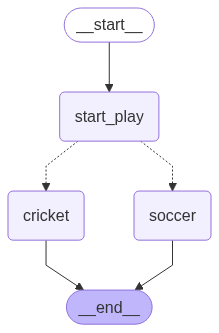

In [11]:
### Display the graph

display(Image(graph_builder.get_graph().draw_mermaid_png()))

# Graph Invocation

In [12]:
graph_builder.invoke({"graph_info" : "My name is Ankur"})

Start Play node has been called
My cricket node is called


{'graph_info': 'My name is Ankur I am planning to play Cricket'}